# Analyze the relationship between the number of insects attacking a plant and variables such as longevity

- 01: Data cleaning
- 02a: ML exploration for Cvalue predictors
- 02b: ML exploration for No_bugs predictors
- 04: build a new phylogeny
- 03a: PGLS phylogenetic controlled comparison for CVal
- 03b: **PGLS phylogenetic controlled comparison for No_bugs**

These data were taken from the EcoFlora database circa 2011.

The original tree however had very few members that overlapped with our data from EcoFlora. I found a more recent phylogeny and pruned that using the `R` package `U.PhyloMaker` in the file `newTree.rmd`.

Step 1: load libraries and data. 

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
# Load your data
data = pd.read_csv('./data/cleaned_20240729')

indepVar = ['NP_ratio', 'clonality_state', 'dicliny_val', 'soil_nutr_val', 'log_long_val']
data['log_long_val'] = np.log(data['long_val'])
data['NP_ratio'] = data['leafN_val']/data['leafP_val']

In [2]:
data

,plant_no,long_val,soil_nutr_val,leafP_val,leafN_val,clonality_state,dicliny_val,plant_name,genus,family,Cval,No_bugs,log_long_val,NP_ratio
0,260070070,100.0,0.0,1.0,10.0,1,3.0,PINUS SYLVESTRIS,PINUS,PINACEAE,NaN,65.0,4.605170,10.0
1,280050020,100.0,0.0,1.0,10.0,1,1.0,JUNIPERUS COMMUNIS,JUNIPERUS,CUPRESSACEAE,NaN,16.0,4.605170,10.0
2,290010010,500.0,3.0,1.0,10.0,1,1.0,TAXUS BACCATA,TAXUS,TAXACEAE,NaN,25.0,6.214608,10.0
3,310010590,NaN,1.0,NaN,NaN,1,1.0,SALIX LAPPONUM,SALIX,SALICACEAE,NaN,3.0,NaN,NaN
4,310020020,NaN,NaN,NaN,NaN,0,1.0,POPULUS X CANESCENS,POPULUS,SALICACEAE,NaN,9.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,2030240140,NaN,NaN,NaN,NaN,1,4.0,ORCHIS PURPUREA,ORCHIS,ORCHIDACEAE,NaN,NaN,NaN,NaN
1732,2030240180,NaN,NaN,NaN,NaN,1,4.0,ORCHIS MASCULA,ORCHIS,ORCHIDACEAE,NaN,NaN,NaN,NaN
1733,2030300010,NaN,NaN,NaN,NaN,1,4.0,OPHRYS INSECTIFERA,OPHRYS,ORCHIDACEAE,NaN,NaN,NaN,NaN
1734,2030300160,NaN,NaN,NaN,NaN,1,4.0,OPHRYS FUCIFLORA,OPHRYS,ORCHIDACEAE,NaN,NaN,NaN,NaN


In [3]:
# Assuming the list corresponds to the index of the DataFrame
# Create a boolean mask where the it is not NaN for Cval
mask = ~pd.isna(data['No_bugs'])

# Apply the mask to the DataFrame to keep corresponding rows
data = data[mask]

# Display the filtered DataFrame and list
data


,plant_no,long_val,soil_nutr_val,leafP_val,leafN_val,clonality_state,dicliny_val,plant_name,genus,family,Cval,No_bugs,log_long_val,NP_ratio
0,260070070,100.0,0.0,1.0,10.0,1,3.0,PINUS SYLVESTRIS,PINUS,PINACEAE,NaN,65.0,4.605170,10.0
1,280050020,100.0,0.0,1.0,10.0,1,1.0,JUNIPERUS COMMUNIS,JUNIPERUS,CUPRESSACEAE,NaN,16.0,4.605170,10.0
2,290010010,500.0,3.0,1.0,10.0,1,1.0,TAXUS BACCATA,TAXUS,TAXACEAE,NaN,25.0,6.214608,10.0
3,310010590,NaN,1.0,NaN,NaN,1,1.0,SALIX LAPPONUM,SALIX,SALICACEAE,NaN,3.0,NaN,NaN
4,310020020,NaN,NaN,NaN,NaN,0,1.0,POPULUS X CANESCENS,POPULUS,SALICACEAE,NaN,9.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1990120740,NaN,NaN,NaN,NaN,2,3.0,CAREX PANICEA,CAREX,CYPERACEAE,NaN,2.0,NaN,NaN
1690,1990121090,NaN,NaN,NaN,NaN,1,3.0,CAREX HUMILIS,CAREX,CYPERACEAE,NaN,1.0,NaN,NaN
1706,1990121640,NaN,NaN,NaN,NaN,1,3.0,CAREX ELATA,CAREX,CYPERACEAE,NaN,2.0,NaN,NaN
1707,1990121670,NaN,NaN,NaN,NaN,2,3.0,CAREX NIGRA,CAREX,CYPERACEAE,NaN,3.0,NaN,NaN


### Step 2: Impute missing data and standardize data

In [4]:
indepVar


['NP_ratio', 'clonality_state', 'dicliny_val', 'soil_nutr_val', 'log_long_val']

In [6]:
from sklearn.impute import KNNImputer # check if KNN is any better
# Standardize the data
scaler = KNNImputer(n_neighbors=3)
data[indepVar] = scaler.fit_transform(data[indepVar])

# Impute missing values
imputer = SimpleImputer(strategy='mean')
# imputer = KNNImputer(n_neighbors=3)
data[indepVar] = imputer.fit_transform(data[indepVar])


data

<ipython-input-6-e7daffa949a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[indepVar] = scaler.fit_transform(data[indepVar])
c:\Users\Seth\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-6-e7daffa949a0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,plant_no,long_val,soil_nutr_val,leafP_val,leafN_val,clonality_state,dicliny_val,plant_name,genus,family,Cval,No_bugs,log_long_val,NP_ratio
0,260070070,100.0,-1.568195e+00,1.0,10.0,-0.372042,-0.462855,PINUS SYLVESTRIS,PINUS,PINACEAE,NaN,65.0,3.267779e+00,-4.871782e-01
1,280050020,100.0,-1.568195e+00,1.0,10.0,-0.372042,-2.693791,JUNIPERUS COMMUNIS,JUNIPERUS,CUPRESSACEAE,NaN,16.0,3.267779e+00,-4.871782e-01
2,290010010,500.0,1.623830e+00,1.0,10.0,-0.372042,-2.693791,TAXUS BACCATA,TAXUS,TAXACEAE,NaN,25.0,4.364652e+00,-4.871782e-01
3,310010590,NaN,-5.041870e-01,NaN,NaN,-0.372042,-2.693791,SALIX LAPPONUM,SALIX,SALICACEAE,NaN,3.0,1.462022e-16,-2.886580e-16
4,310020020,NaN,-1.277119e-16,NaN,NaN,-2.420627,-2.693791,POPULUS X CANESCENS,POPULUS,SALICACEAE,NaN,9.0,1.462022e-16,-2.886580e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1990120740,NaN,-1.277119e-16,NaN,NaN,1.676543,-0.462855,CAREX PANICEA,CAREX,CYPERACEAE,NaN,2.0,1.462022e-16,-2.886580e-16
1690,1990121090,NaN,-1.277119e-16,NaN,NaN,-0.372042,-0.462855,CAREX HUMILIS,CAREX,CYPERACEAE,NaN,1.0,1.462022e-16,-2.886580e-16
1706,1990121640,NaN,-1.277119e-16,NaN,NaN,-0.372042,-0.462855,CAREX ELATA,CAREX,CYPERACEAE,NaN,2.0,1.462022e-16,-2.886580e-16
1707,1990121670,NaN,-1.277119e-16,NaN,NaN,1.676543,-0.462855,CAREX NIGRA,CAREX,CYPERACEAE,NaN,3.0,1.462022e-16,-2.886580e-16


### Step 3: Tidy up the names so that they match the new tree produced

In [7]:
# convert 'genus' to title case to match the tree
data['genus'] = data['genus'].str.title()
data['family'] = data['family'].str.title()
data['plant_name'] = data['plant_name'].str.title()

data['plant_name'] = data['plant_name'].str.replace(" ", "_")
data.columns
data

<ipython-input-7-f124724262db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['genus'] = data['genus'].str.title()
<ipython-input-7-f124724262db>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['family'] = data['family'].str.title()
<ipython-input-7-f124724262db>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

,plant_no,long_val,soil_nutr_val,leafP_val,leafN_val,clonality_state,dicliny_val,plant_name,genus,family,Cval,No_bugs,log_long_val,NP_ratio
0,260070070,100.0,-1.568195e+00,1.0,10.0,-0.372042,-0.462855,Pinus_Sylvestris,Pinus,Pinaceae,NaN,65.0,3.267779e+00,-4.871782e-01
1,280050020,100.0,-1.568195e+00,1.0,10.0,-0.372042,-2.693791,Juniperus_Communis,Juniperus,Cupressaceae,NaN,16.0,3.267779e+00,-4.871782e-01
2,290010010,500.0,1.623830e+00,1.0,10.0,-0.372042,-2.693791,Taxus_Baccata,Taxus,Taxaceae,NaN,25.0,4.364652e+00,-4.871782e-01
3,310010590,NaN,-5.041870e-01,NaN,NaN,-0.372042,-2.693791,Salix_Lapponum,Salix,Salicaceae,NaN,3.0,1.462022e-16,-2.886580e-16
4,310020020,NaN,-1.277119e-16,NaN,NaN,-2.420627,-2.693791,Populus_X_Canescens,Populus,Salicaceae,NaN,9.0,1.462022e-16,-2.886580e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1990120740,NaN,-1.277119e-16,NaN,NaN,1.676543,-0.462855,Carex_Panicea,Carex,Cyperaceae,NaN,2.0,1.462022e-16,-2.886580e-16
1690,1990121090,NaN,-1.277119e-16,NaN,NaN,-0.372042,-0.462855,Carex_Humilis,Carex,Cyperaceae,NaN,1.0,1.462022e-16,-2.886580e-16
1706,1990121640,NaN,-1.277119e-16,NaN,NaN,-0.372042,-0.462855,Carex_Elata,Carex,Cyperaceae,NaN,2.0,1.462022e-16,-2.886580e-16
1707,1990121670,NaN,-1.277119e-16,NaN,NaN,1.676543,-0.462855,Carex_Nigra,Carex,Cyperaceae,NaN,3.0,1.462022e-16,-2.886580e-16


In [8]:
data['genus'].nunique()

364

### Load libraries for handling the tree and stats on it

In [9]:
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM

# Load your phylogenetic tree using Biopython
from Bio import Phylo

### Import the tree.
See the R file `newTree.rmd` for how this was produced. 

Collect the `phylo_groups` using a lambda through the `.find_clades()` function on our tree. Then map those values onto our data.


In [10]:
tree = Phylo.read(file='./data/pruned_megatree_20240730.tre', format='newick')

# Create a dictionary to map species to their phylogenetic groups
phylo_groups = {clade.name: idx for idx, clade in enumerate(tree.find_clades())}
data['phylo_group'] = data['plant_name'].map(phylo_groups)

<ipython-input-10-cef141ab6557>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['phylo_group'] = data['plant_name'].map(phylo_groups)


In [11]:
phylo_groups # some odd ones in there

{'Spermatophyta': 0,
 'mrcaott2ott2645': 1,
 'Mesangiospermae': 2,
 'mrcaott2ott121': 3,
 'mrcaott2ott10930': 4,
 'eudicotyledons': 5,
 'mrcaott2ott8379': 6,
 'Pentapetalae': 7,
 'mrcaott248ott19688': 8,
 'mrcaott248ott557': 9,
 'mrcaott248ott27233': 10,
 'mrcaott248ott650': 11,
 'mrcaott248ott320': 12,
 'campanulids': 13,
 'mrcaott320ott1673': 14,
 'mrcaott320ott77310': 15,
 'Asterales.rn.d8s.tre': 16,
 None: 2362,
 'Seriphidium_Maritimum': 19,
 'Rudbeckia_Laciniata': 20,
 'Eupatorium_Cannabinum': 28,
 'Galinsoga_Quadriradiata': 30,
 'Galinsoga_Parviflora': 31,
 'Bidens_Frondosa': 33,
 'Bidens_Cernua': 34,
 'Bidens_Tripartita': 35,
 'Bidens_Connata': 36,
 'Filago_Pyramidata': 40,
 'Filago_Lutescens': 41,
 'Filago_Vulgaris': 42,
 'Filago_Minima': 43,
 'Antennaria_Dioica': 44,
 'Gnaphalium_Supinum': 46,
 'Gnaphalium_Norvegicum': 47,
 'Gnaphalium_Uliginosum': 48,
 'Gnaphalium_Sylvaticum': 49,
 'Gnaphalium_Luteoalbum': 50,
 'Pulicaria_Dysenterica': 53,
 'Pulicaria_Vulgaris': 54,
 'Inula_C

In [12]:
data
# Find duplicates in the 'text' column
duplicates = data[data.duplicated('plant_name')]

# Print the duplicates
print(duplicates)


        plant_no  long_val  soil_nutr_val  leafP_val  leafN_val  \
8      340020020     100.0   5.598214e-01        1.0       20.0   
42     570040010       0.5   5.598214e-01        NaN        NaN   
44     570060070       NaN   5.598214e-01        NaN        NaN   
52     570110010       NaN   1.623830e+00        NaN        NaN   
55     570130020       0.5  -5.041870e-01        NaN        NaN   
...          ...       ...            ...        ...        ...   
1461  1691381870       NaN  -1.277119e-16        NaN        NaN   
1519  1830460040       NaN  -1.277119e-16        NaN        NaN   
1569  1930160010       NaN  -1.277119e-16        NaN        NaN   
1631  1990030010       NaN  -1.277119e-16        NaN        NaN   
1634  1990030040       NaN  -1.277119e-16        NaN        NaN   

      clonality_state  dicliny_val                plant_name        genus  \
8           -0.372042    -2.693791           Alnus_Glutinosa        Alnus   
42          -0.372042     0.652613       

In [13]:
# Filter out all duplicates based on 'plant_name'
df_no_duplicates = data.drop_duplicates(subset='plant_name', keep='first')

# Print the resulting DataFrame
print(df_no_duplicates)

        plant_no  long_val  soil_nutr_val  leafP_val  leafN_val  \
0      260070070     100.0  -1.568195e+00        1.0       10.0   
1      280050020     100.0  -1.568195e+00        1.0       10.0   
2      290010010     500.0   1.623830e+00        1.0       10.0   
3      310010590       NaN  -5.041870e-01        NaN        NaN   
4      310020020       NaN  -1.277119e-16        NaN        NaN   
...          ...       ...            ...        ...        ...   
1676  1990120740       NaN  -1.277119e-16        NaN        NaN   
1690  1990121090       NaN  -1.277119e-16        NaN        NaN   
1706  1990121640       NaN  -1.277119e-16        NaN        NaN   
1707  1990121670       NaN  -1.277119e-16        NaN        NaN   
1708  1990121680       NaN  -1.277119e-16        NaN        NaN   

      clonality_state  dicliny_val           plant_name      genus  \
0           -0.372042    -0.462855     Pinus_Sylvestris      Pinus   
1           -0.372042    -2.693791   Juniperus_Communis

### Confirm that there aren't any rows without phylo_group assigned

In [14]:
mask = ~pd.isna(df_no_duplicates['phylo_group'])

# Apply the mask to the DataFrame to keep corresponding rows
data_thin = df_no_duplicates[mask]
data_thin

data_thin.shape
# v few in the tree 96

(743, 15)

### Remove any extreme outliers in the number of insects associated with them

Quite a few there with lots of insects. 

In [16]:
# Calculate Z-scores for the target variable
from scipy.stats import zscore
data_thin['Bugs_zscore'] = zscore(data_thin['No_bugs'])

# Identify outliers (e.g., Z-score > 3 or < -3)
outliers = data_thin[np.abs(data_thin['Bugs_zscore']) > 3]
outliers

,plant_no,long_val,soil_nutr_val,leafP_val,leafN_val,clonality_state,dicliny_val,plant_name,genus,family,Cval,No_bugs,log_long_val,NP_ratio,phylo_group,Bugs_zscore
652,340010010,NaN,-1.277119e-16,NaN,NaN,-0.372042,-0.462855,Betula_Pendula,Betula,Betulaceae,NaN,415.0,1.462022e-16,-2.886580e-16,1282,16.112570
653,340010020,NaN,-1.277119e-16,NaN,NaN,-0.372042,-0.462855,Betula_Pubescens,Betula,Betulaceae,NaN,401.0,1.462022e-16,-2.886580e-16,1281,15.556143
654,360030120,NaN,-1.277119e-16,NaN,NaN,-0.372042,-0.462855,Quercus_Petraea,Quercus,Fagaceae,NaN,95.0,1.462022e-16,-2.886580e-16,1290,3.394246
655,360030150,NaN,-1.277119e-16,NaN,NaN,-0.372042,-0.462855,Quercus_Robur,Quercus,Fagaceae,NaN,128.0,1.462022e-16,-2.886580e-16,1289,4.705823
979,800270030,NaN,-1.277119e-16,NaN,NaN,-2.420627,0.652613,Malus_Sylvestris,Malus,Rosaceae,NaN,89.0,1.462022e-16,-2.886580e-16,1229,3.155777
1045,810590070,NaN,-1.277119e-16,NaN,NaN,-0.372042,0.652613,Lotus_Corniculatus,Lotus,Fabaceae,NaN,134.0,1.462022e-16,-2.886580e-16,1107,4.944291
1106,1050010050,NaN,-1.277119e-16,NaN,NaN,-0.372042,0.652613,Tilia_Cordata,Tilia,Tiliaceae,NaN,115.0,1.462022e-16,-2.886580e-16,1527,4.189141
1448,1691180280,NaN,-1.277119e-16,NaN,NaN,-0.372042,0.652613,Cirsium_Vulgare,Cirsium,Asteraceae,NaN,104.0,1.462022e-16,-2.886580e-16,203,3.751948


In [17]:
outliers['plant_name']

652         Betula_Pendula
653       Betula_Pubescens
654        Quercus_Petraea
655          Quercus_Robur
979       Malus_Sylvestris
1045    Lotus_Corniculatus
1106         Tilia_Cordata
1448       Cirsium_Vulgare
Name: plant_name, dtype: object

### Some that have lots of insects.

Betula = beech

Quercus = oak

Malus = apple

Lotus = Trefoil used as forage for livestock, in erosion control, and in wildflower meadows

Tilia = Littleleaf Linden

Cirsium = thistle

In [18]:

# drop those
# Remove outliers from the DataFrame
data_thin = data_thin[np.abs(data_thin['Bugs_zscore']) <= 5]

# Drop the Z-score column as it's no longer needed
data_thin = data_thin.drop(columns=['Bugs_zscore'])


### Separate out the variables and add a constant for the model

In [19]:
# Define the independent variables
indepVar = ['log_long_val', 'NP_ratio', 'clonality_state', 'dicliny_val', 'soil_nutr_val']
X = data_thin[indepVar]
Y = data_thin['No_bugs']
# Add a constant to the model (intercept)
X = sm.add_constant(X)

### Run the Mixed Linear Model for Phylogenetic Generalized Least Squares

In [20]:
# Using 'phylo_group' as a random effect to account for phylogenetic relatedness

# For number of insects
md = MixedLM(Y, X, groups=data_thin['phylo_group'])
pgls = md.fit()
print(pgls.summary())

c:\Users\Seth\Anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


          Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: No_bugs   
No. Observations:   741     Method:             REML      
No. Groups:         741     Scale:              98.1787   
Min. group size:    1       Log-Likelihood:     -3000.6010
Max. group size:    1       Converged:          Yes       
Mean group size:    1.0                                   
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
const            8.714    0.516 16.874 0.000  7.702  9.726
log_long_val     4.118    0.888  4.639 0.000  2.378  5.858
NP_ratio        -0.718    1.881 -0.382 0.703 -4.405  2.968
clonality_state  0.317    0.461  0.688 0.492 -0.586  1.220
dicliny_val     -2.164    0.288 -7.507 0.000 -2.728 -1.599
soil_nutr_val    1.015    0.885  1.147 0.251 -0.719  2.749
Group Var       98.179                                    



### Summary
Very strong effect of dicliny and longevity on the number of insects associated with a species. Examining the N and P separately or as a ration had no predictive power. 

Reservations:
1. have there been any errors in production of the spreadsheet from plant.db? How can I check that?

------

below I explore colinearity and check with a few plots. It is important to note that the boxplots show the mean value increasing with longevity while the scatter plot looks like the opposite. I think this is because there are far more short lived plants in the dataset. 

reminder for the levels of dicliny and longevity:
### diclyny_val
```python
print(X['dicliny_val'].value_counts())
X['dicliny_val'] = X['dicliny_val'].replace({'dioecious':1,\
    'subandroecious':2, \
    'subdioecious':2, \
    'androdioecious':2, \
    'gynodioecious':2, \
    'gynomonoecious':3, \
    'andromonoecious':3, \
    'monoecious':3, \
    'gynoandromonoecious':3, \
    'hermaphrodite':4, \
    'polygamous':4, \
    'trioecious':4}) 
print(X['dicliny_val'].value_counts())
```
Resulting in:
```
hermaphrodite          1228
monoecious              150
gynodioecious           128
gynomonoecious          119
dioecious                70
andromonoecious          45
androdioecious           13
polygamous                7
gynoandromonoecious       4
trioecious                3
subdioecious              1
subandroecious            1
Name: dicliny_val, dtype: int64
4.0    1238
3.0     318
2.0     143
1.0      70
Name: dicliny_val, dtype: int64
```
### long_val
```python
print(X['long_val'].value_counts())
# convert <1 to 0.5, 1-2 to 1, 2-10 to 2, 10-100 to 10, 100-500 to 100, >500 to 500
X['long_val'] = X['long_val'].replace({'<1':0.5, '1-2':1, '2-10':2, '10-100':10, '100-500':100, '>500':500})
print(X['long_val'].value_counts())
```

```
<1         457
100-500     16
10-100      12
2-10         9
1-2          2
>500         2
Name: long_val, dtype: int64
0.5      457
100.0     16
10.0      12
2.0        9
500.0      2
1.0        2
Name: long_val, dtype: int64
```

### Check for any colinearity
Note: This doesn't work after using KNN imputation (simple works as just replaces NaN with mean value).

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X is your design matrix without the intercept
X = data_thin[['leafP_val', 'leafN_val', 'clonality_state', 'dicliny_val', 'soil_nutr_val', 'log_long_val']]
X


,leafP_val,leafN_val,clonality_state,dicliny_val,soil_nutr_val,log_long_val
0,1.0,10.0,-0.372042,-0.462855,-1.568195e+00,3.267779e+00
1,1.0,10.0,-0.372042,-2.693791,-1.568195e+00,3.267779e+00
2,1.0,10.0,-0.372042,-2.693791,1.623830e+00,4.364652e+00
3,NaN,NaN,-0.372042,-2.693791,-5.041870e-01,1.462022e-16
4,NaN,NaN,-2.420627,-2.693791,-1.277119e-16,1.462022e-16
...,...,...,...,...,...,...
1676,NaN,NaN,1.676543,-0.462855,-1.277119e-16,1.462022e-16
1690,NaN,NaN,-0.372042,-0.462855,-1.277119e-16,1.462022e-16
1706,NaN,NaN,-0.372042,-0.462855,-1.277119e-16,1.462022e-16
1707,NaN,NaN,1.676543,-0.462855,-1.277119e-16,1.462022e-16


In [25]:
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


MissingDataError: exog contains inf or nans

VIF scores > 5 would be highly correlated and could cause problems. This looks ok. Might be worth trying to engineer the P and N vals?

## Try with standardized bug nos?

I looked into it a bit and it seems that scaling is helpful for some ML approaches but not regressions (looses interpretability). Trying below, just for the sake of it. 

In [21]:
# Standardize the data
y = np.array(Y)
y = y.reshape(-1, 1)
Yscaled = scaler.fit_transform(y)

In [22]:
# Using 'phylo_group' as a random effect to account for phylogenetic relatedness

# For number of insects
md = MixedLM(Yscaled, X, groups=data_thin['phylo_group'])
pgls = md.fit()
print(pgls.summary())

c:\Users\Seth\Anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


           Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  y         
No. Observations:  741      Method:              REML      
No. Groups:        741      Scale:               0.4784    
Min. group size:   1        Log-Likelihood:      -1044.5219
Max. group size:   1        Converged:           Yes       
Mean group size:   1.0                                     
-----------------------------------------------------------
                Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-----------------------------------------------------------
const            0.013    0.036   0.351 0.726 -0.058  0.083
leafP_val        0.182    0.144   1.263 0.207 -0.100  0.464
leafN_val       -0.039    0.144  -0.267 0.789 -0.321  0.244
clonality_state  0.018    0.035   0.530 0.596 -0.050  0.086
dicliny_val     -0.148    0.010 -14.836 0.000 -0.168 -0.129
soil_nutr_val    0.065    0.062   1.053 0.292 -0.056  0.187
log_long_val     0.293    0.067   4.375 0.000  0.16

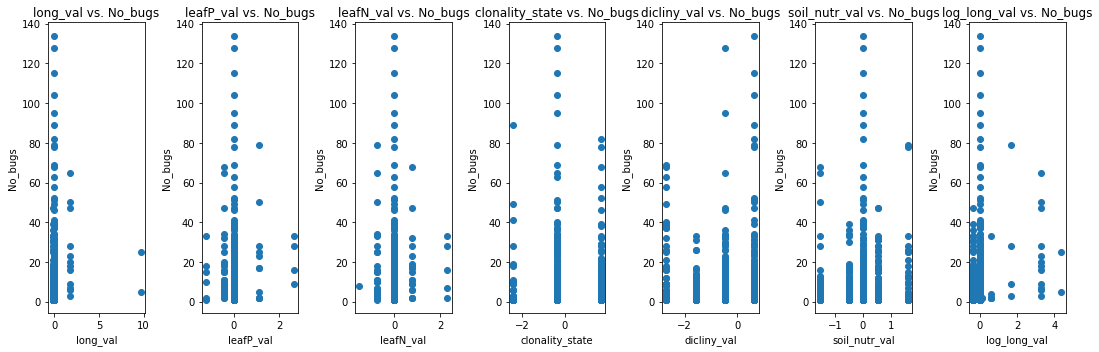

In [35]:
import matplotlib.pyplot as plt
# summarize with histograms

# Create scatter plots
plt.figure(figsize=(15, 5))
for i, var in enumerate(indepVar, 1):
    plt.subplot(1, len(indepVar), i)
    plt.scatter(data_thin[var], data_thin['No_bugs'])
    plt.xlabel(var)
    plt.ylabel('No_bugs')
    plt.title(f'{var} vs. No_bugs')

plt.tight_layout()
plt.show()


c:\Users\Seth\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Seth\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Seth\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Seth\Anaconda3\l

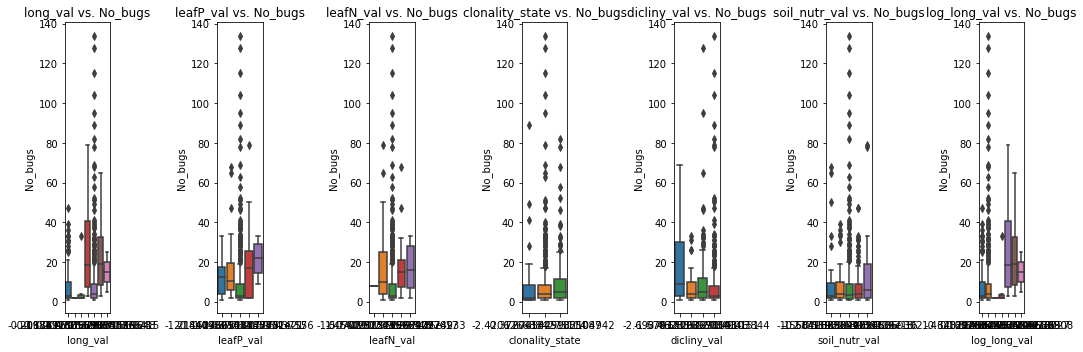

In [36]:
#  Create scatter plots
plt.figure(figsize=(15, 5))
for i, var in enumerate(indepVar, 1):
    plt.subplot(1, len(indepVar), i)
    sns.boxplot(data_thin[var], data_thin['No_bugs'])
    plt.xlabel(var)
    plt.ylabel('No_bugs')
    plt.title(f'{var} vs. No_bugs')

plt.tight_layout()
plt.show()

# # Boxplot for long_val
# plt.subplot(1, 3, 1)
# sns.boxplot(x='long_val', y='No_bugs', data=data_first)
# plt.title('Boxplot of No_bugs by long_val')

# # Boxplot for long_val
# plt.subplot(1, 3, 2)
# sns.boxplot(x='log_long_val', y='No_bugs', data=data_first)
# plt.title('Boxplot of No_bugs by log_long_val')

# # Boxplot for dicliny_val
# plt.subplot(1, 3, 3)
# sns.boxplot(x='dicliny_val', y='No_bugs', data=data_first)
# plt.title('Boxplot of No_bugs by dicliny_val')


### Strangely, the number of bugs is lower on longer lived plants. Is there any chance this got messed up?

Seems like the averages go up, but there are many outliers in short lived spp. 

In [28]:
data_first = pd.read_csv('~/Dropbox/plant.db/cleaned_20240729')
data_first['log_long_val'] = np.log(data_first['long_val'])


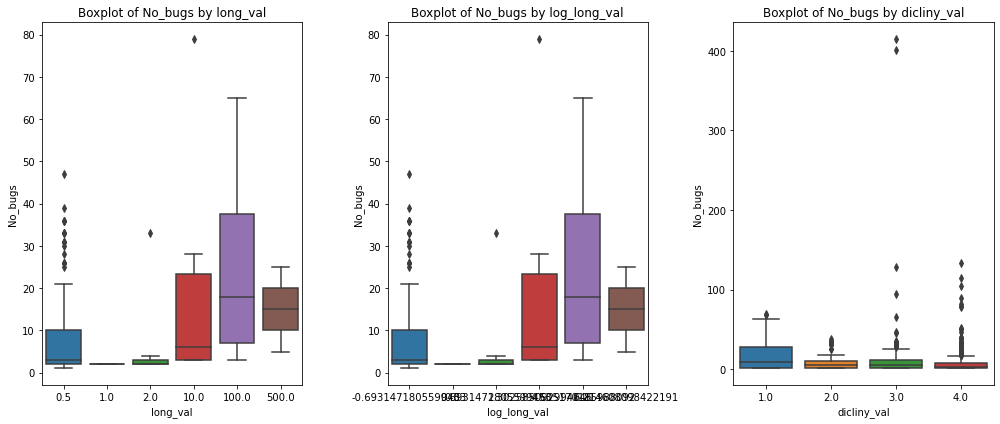

In [30]:
# Boxplot of dicliny and long_val vs No_bugs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create side-by-side boxplots
plt.figure(figsize=(14, 6))

# Boxplot for long_val
plt.subplot(1, 3, 1)
sns.boxplot(x='long_val', y='No_bugs', data=data_first)
plt.title('Boxplot of No_bugs by long_val')

# Boxplot for long_val
plt.subplot(1, 3, 2)
sns.boxplot(x='log_long_val', y='No_bugs', data=data_first)
plt.title('Boxplot of No_bugs by log_long_val')

# Boxplot for dicliny_val
plt.subplot(1, 3, 3)
sns.boxplot(x='dicliny_val', y='No_bugs', data=data_first)
plt.title('Boxplot of No_bugs by dicliny_val')

plt.tight_layout()
plt.show()


Below is if you are only testing the tree at the level of genus. I have used a R package called U.Phylomaker to prune a megatree

In [9]:
# Group by 'genus' and calculate the mean for each group
# genus_means = data.groupby('genus').mean().reset_index()
# genus_means
# lots of taxa that are not in the tree

,genus,plant_no,long_val,soil_nutr_val,leafP_val,leafN_val,clonality_state,dicliny_val,Cval,No_bugs,log_long_val
0,adoxa,1650010010,-2.670686e-01,0.661748,5.718238e-16,0.000000,-0.387374,0.587945,28.6,NaN,-3.017797e-01
1,aira,1930760020,-2.670686e-01,-1.822710,5.718238e-16,0.000000,-0.387374,0.587945,12.1,1.0,-3.017797e-01
2,alliaria,680060010,-2.670686e-01,0.661748,5.718238e-16,0.000000,-0.387374,0.587945,3.9,7.0,-3.017797e-01
3,alnus,340020020,4.535969e+00,0.661748,-6.645846e-01,1.226238,-0.387374,-1.700840,1.1,47.0,4.358219e+00
4,anemone,610140010,-2.670686e-01,0.661748,-6.645846e-01,1.226238,-0.387374,0.587945,38.1,6.0,-3.017797e-01
...,...,...,...,...,...,...,...,...,...,...,...
91,tripleurospermum,1690600048,4.287391e-17,0.661748,5.718238e-16,0.000000,-0.387374,-0.556448,5.3,9.0,4.882341e-17
92,trisetum,1930700130,-2.670686e-01,-0.580481,5.718238e-16,0.000000,-0.387374,0.587945,4.7,10.0,-3.017797e-01
93,tussilago,1690890010,-2.670686e-01,-1.822710,5.718238e-16,-1.576592,2.251611,-0.556448,4.6,11.0,-3.017797e-01
94,urtica,400010020,-2.670686e-01,0.661748,4.485946e+00,4.029068,2.251611,-2.845233,2.9,28.0,-3.017797e-01
